In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
data = pd.read_csv('HousingData.csv')
display (data.head())



,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
data = data.dropna()  

Retornamos um novo dataframe sem as linhas que possuem valor NaN

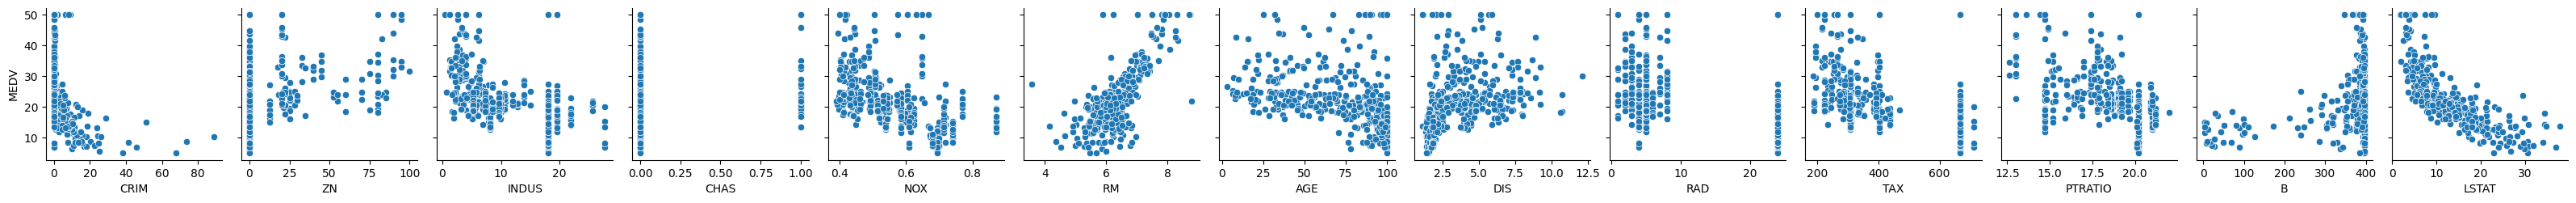

In [4]:
sns.pairplot(data, y_vars=['MEDV'], x_vars=data.columns.drop('MEDV'))
plt.show()

**Linearity Analysis**

We observe that the variables **RM** and **LSTAT** show a clearer linear relationship with **MEDV**. The other variables exhibit little linearity and a large dispersion of the data.  
For this reason, we will use only **RM** and **LSTAT** as predictor variables to estimate **MEDV**.


In [5]:
print (len(data))

394


In [9]:
test_size = 0.2
np.random.seed(42)
index = np.arange(len(data))
np.random.shuffle(indices)
split_point = int(len(data)*(1-test_size))

train_indices = index[:split_point]
test_indices = index[split_point:]

train_data = data.iloc[train_indices]
test_data = data.iloc[test_indices]

x_train = train_data[['LSTAT', 'RM']]
y_train = train_data[['MEDV']]
x_test = test_data[['LSTAT', 'RM']]
y_test = test_data[['MEDV']]

**Bias**

We add the bias term (intercept) to the dataset to ensure that the normal equation is calculated correctly.


In [10]:
x_train_ = np.c_[np.ones((x_train.shape[0], 1)), x_train]
x_test_ = np.c_[np.ones((x_test.shape[0], 1)), x_test]

In [11]:
def find_theta (x, y):
    result = np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)
    return result

After calculating the coefficient vector $\theta$, we need to multiply it by the values of the independent variables $X$ to obtain the predictions $\hat{y}$ (y_pred). In other words, we apply the linear model equation:

$$
\hat{y} = X \cdot \theta
$$

In this way, we transform the input values into predictions for the target variable using the parameters fitted by the model.



In [12]:
theta = find_theta (x_train, y_train)
y_pred = x_test.dot(theta)
print("Previsão para MEDV: ", y_pred)

Previsão para MEDV:               0
404  10.247453
405  13.719091
408  11.277111
410  22.051175
411  19.598489
..         ...
499  18.037217
500  20.766202
502  24.473962
503  30.813220
504  29.398151

[79 rows x 1 columns]


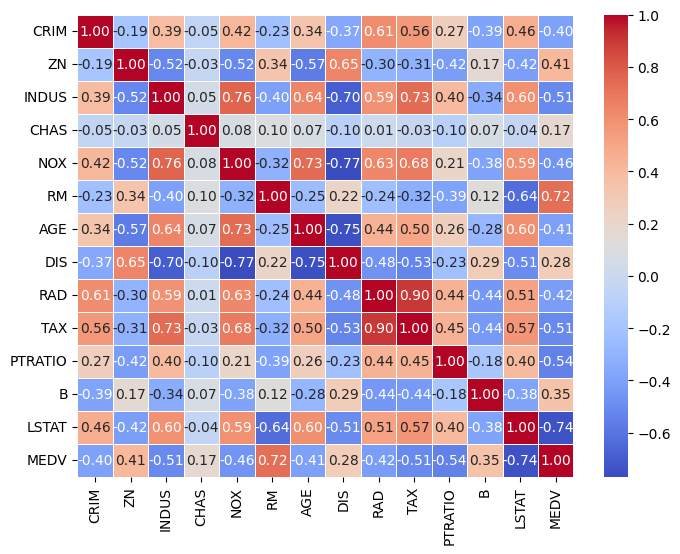

In [13]:
corr = data.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot = True, cmap = 'coolwarm', fmt = ".2f", linewidths = 0.5)
plt.show()
      

**Heatmap Analysis**

Both **RM** and **LSTAT** show a moderate correlation with each other.


In [14]:
theta = find_theta (x_train, y_train)
y_pred = x_test.dot(theta)
print(f"Prediction for MEDV: {y_pred}")

Previsão para MEDV:              0
404  10.247453
405  13.719091
408  11.277111
410  22.051175
411  19.598489
..         ...
499  18.037217
500  20.766202
502  24.473962
503  30.813220
504  29.398151

[79 rows x 1 columns]


In [15]:

def mse(y_test, y_pred):
    y_test = np.array(y_test, dtype=float)
    y_pred = np.array(y_pred, dtype=float)
    return np.mean((y_test - y_pred) ** 2)

val = mse(y_test, y_pred)
rmse = np.sqrt(val)
print('MSE: ', val)
print('RMSE: ', rmse)


MSE:  28.370894920770475
RMSE:  5.326433602399496


In [54]:
print(y_test.describe())

            MEDV
count  79.000000
mean   21.616456
std     8.186894
min     7.000000
25%    17.450000
50%    20.600000
75%    24.350000
max    50.000000


**MSE** = 29.0 | **RMSE** = 5.39 - when we apply Mode to the NaN values

**MSE** = 28.8 | **RMSE** = 5.36 - when we apply Mean to the NaN values

**MSE** = 23.4 | **RMSE** = 4.8 - when we simply remove the columns with NaN


new